## [미션] wine의 데이터셋이해
###레드와인과 화이트 와인의 alcohol, sugar, PH의 관계 조사
- 이 자료의 class가 1이면 화이트 화인/0이면 레드와인임

- alcohol: 알콜농도
- sugar: 당도
- PH: 산도

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

## [미션] 자료 호출 및 합치기
########################################
###  wine1=wine1.csv  
###  wine2=wine2.csv
#######################################

In [2]:
wine1 = pd.read_csv("data/21.09.17 학습자료/wine1.csv", sep='\t')
wine2 = pd.read_csv("data/21.09.17 학습자료/wine2.csv", sep='\t')

In [3]:
wine1.head()

,index,alcohol,class
0,7001,9.90,999.0
1,1,9.40,0.0
2,2,9.80,0.0
3,3,9.99,999.0
4,6498,9.80,0.0


In [4]:
wine2.head()

,index,sugar_PH
0,7000,2.3/3.5
1,1,1.9/3.51
2,2,2.6/3.2
3,6498,2.3/3.26
4,4,1.9/3.16


########################################
### [두자료의 교집합 자료만 보기] 데이콘 경진대회 교재 P16 참조
###  wine1과 wine2의 index 필드값이 같은 자료만 가져오기
### 최종 wine 변수에 할당
### wine['class']의 최대값1, 최소값 0 확인 (max, min 함수로 출력)
#######################################

In [5]:
wine = pd.merge(wine1, wine2, on='index')
wine.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
2,6498,9.8,0.0,2.3/3.26
3,4,9.8,0.0,1.9/3.16
4,5,9.4,0.0,1.9/3.51


In [6]:
wine['class'].min(), wine['class'].max()

(0.0, 1.0)

########################################
### wine자료와 wine2 자료를  연결하여서
### wine의 index번호에 해당하는
### wine2자료의 sugar_PH값 가져와  df 데이터셋 제작
### df 데이터셋의 sugar_PH의  값 분리하여
### df['sugar']   df['PH'] 변수로 작성
#######################################

In [7]:
df = wine[['alcohol', 'class', 'sugar_PH']]
df

,alcohol,class,sugar_PH
0,9.4,0.0,1.9/3.51
1,9.8,0.0,2.6/3.2
2,9.8,0.0,2.3/3.26
3,9.8,0.0,1.9/3.16
4,9.4,0.0,1.9/3.51
...,...,...,...
6492,11.2,1.0,1.6/3.27
6493,9.6,1.0,8/3.15
6494,9.4,1.0,1.2/2.99
6495,12.8,1.0,1.1/3.34


In [8]:
df.info()
# object 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alcohol   6497 non-null   float64
 1   class     6493 non-null   float64
 2   sugar_PH  6497 non-null   object 
dtypes: float64(2), object(1)
memory usage: 203.0+ KB


In [9]:
import re

df[['sugar', 'PH']] = pd.DataFrame(df['sugar_PH'].str.split('/').tolist())
df = df.drop(['sugar_PH'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   object 
 3   PH       6497 non-null   object 
dtypes: float64(2), object(2)
memory usage: 253.8+ KB


########################################
### df의 각 필드 타입 확인 및 데이터 갯수 확인
########################################
########################################
### sugar, PH의 필드형식 float64로 변환
#######################################

In [10]:
df.loc[:,['sugar']] = df.loc[:,['sugar']].astype('float')
df.loc[:,['PH']] = df.loc[:,['PH']].astype('float')

In [11]:
df.head()

,alcohol,class,sugar,PH
0,9.4,0.0,1.9,3.51
1,9.8,0.0,2.6,3.20
2,9.8,0.0,2.3,3.26
3,9.8,0.0,1.9,3.16
4,9.4,0.0,1.9,3.51


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [13]:
df.isna().sum()

alcohol    0
class      4
sugar      0
PH         0
dtype: int64

########################################
### [두자료의 교집합 자료만 보기] 데이콘 경진대회 교재 P37 참조
### 숫자값 필드 결측치 0으로 치환
#######################################

In [14]:
df = df.fillna(0)
df.isna().sum()

alcohol    0
class      0
sugar      0
PH         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6497 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [16]:
df.corr()

,alcohol,class,sugar,PH
alcohol,1.000000,0.032970,-0.359415,0.121248
class,0.032970,1.000000,0.348821,-0.329129
sugar,-0.359415,0.348821,1.000000,-0.267320
PH,0.121248,-0.329129,-0.267320,1.000000


## [미션] 집계 및 시각화
- 데이콘 경진대회 KBO자료의 시각화 도구 또는 다른 사이트 참조하여 시각화 도구에서 필요한 시각화를 진행하여 보세요. 
- 기본: 히스토그램 / 산점도 / 박스플랏 / 상관도분석

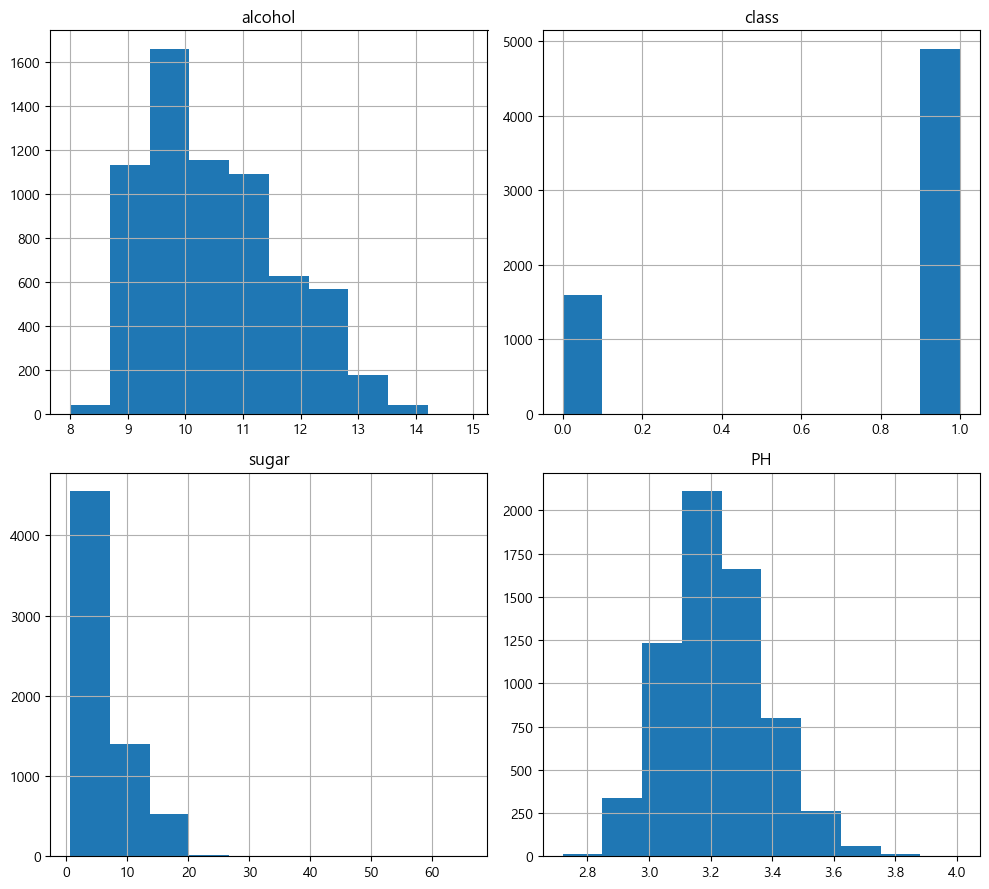

In [17]:
# 히스토그램
df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

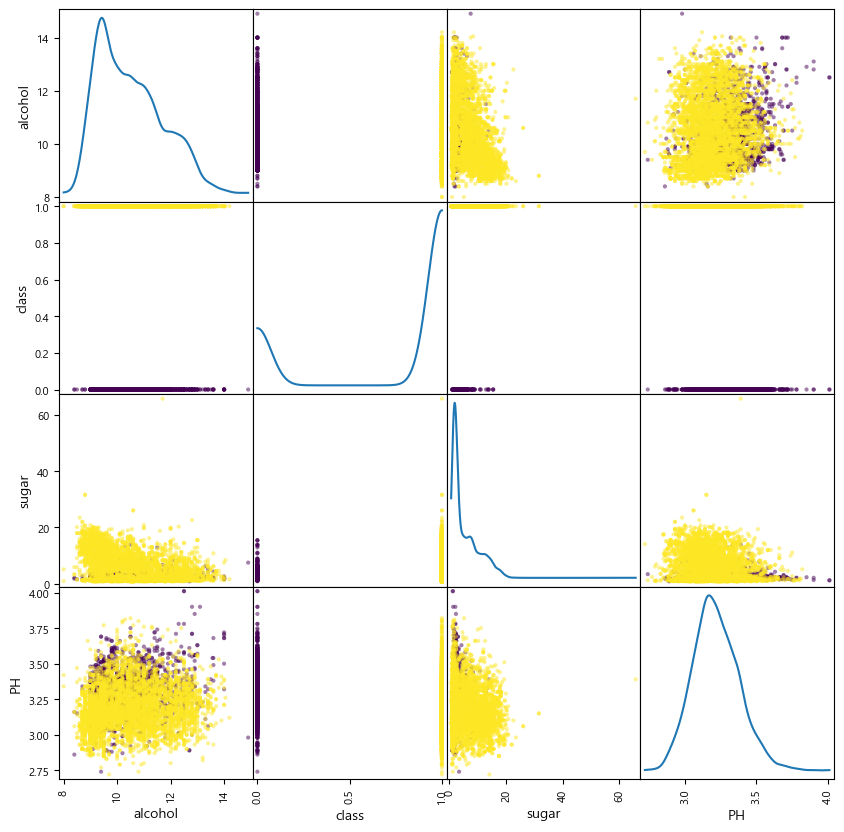

In [18]:
# 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               c = df['class'],
               alpha=0.5, 
               figsize=(10, 10), 
               diagonal='kde')
plt.show()

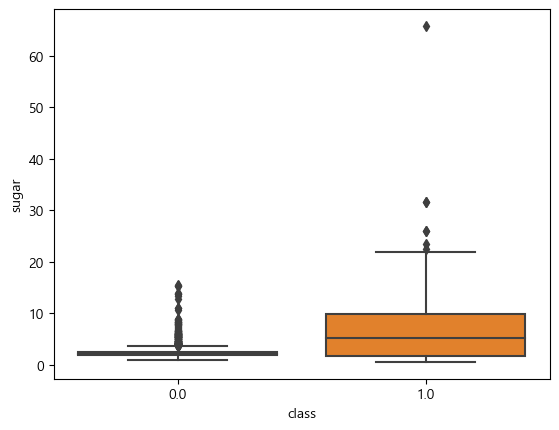

In [19]:
# 박스플롯
import warnings
warnings.filterwarnings(action='ignore')
# 워닝제거
sns.boxplot(x='class',y='sugar',data=df)
plt.show()

# 당도별 이상치 존재 확인

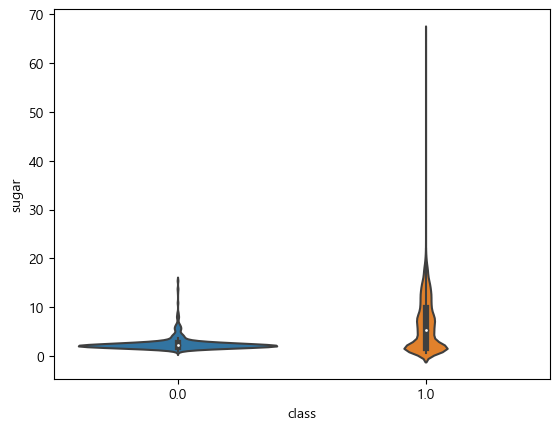

In [20]:
# 바이올린플롯
import warnings
warnings.filterwarnings(action='ignore')
# 워닝제거
sns.violinplot(x='class',y='sugar',data=df)
plt.show()

# 당도별 이상치 존재 확인

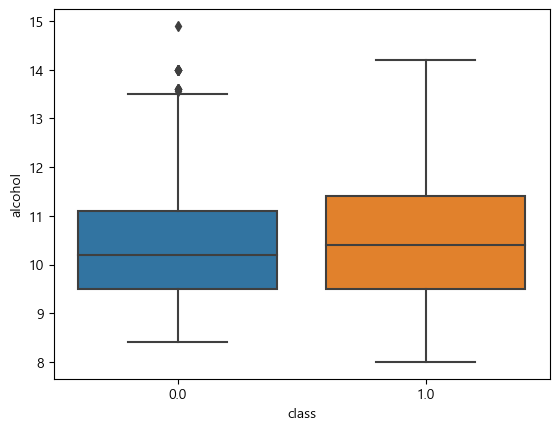

In [21]:
sns.boxplot(x='class',y='alcohol',data=df)
plt.show()
# 클래스별 알콜 박스플롯

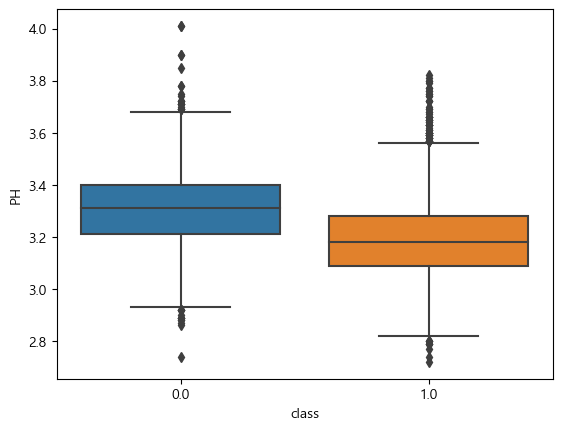

In [22]:
sns.boxplot(x='class',y='PH',data=df)
plt.show()
# 클래스별 PH 박스플롯

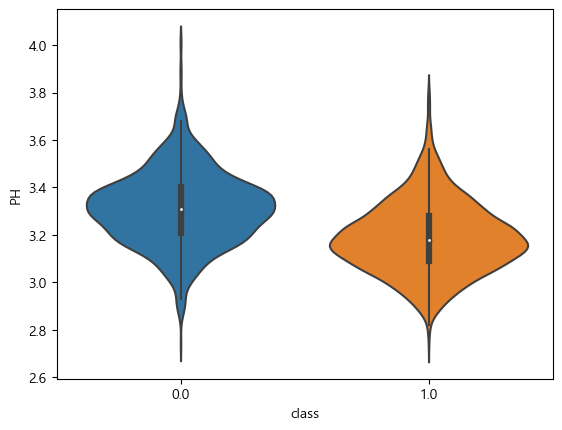

In [23]:
sns.violinplot(x='class',y='PH',data=df)
plt.show()
# 클래스별 PH 바이올린 플롯

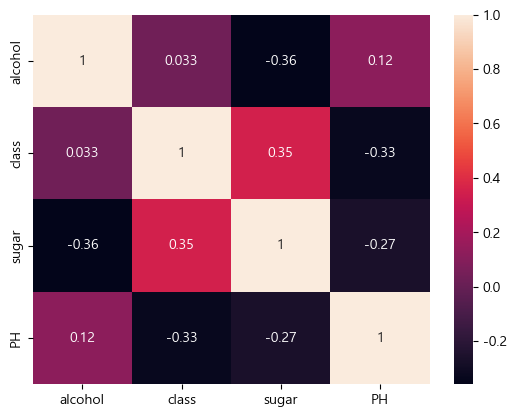

In [24]:
# 상관도 분석
sns.heatmap(df.corr(), annot=True)
plt.show()

## [미션] x,y 데이터 분할
- class만 레이블(y값)으로 변환
- 그외는 특징값(X값임)


########################################
### y_data
### x_data 
#######################################

In [25]:
y_data = df['class']
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64

In [26]:
df.columns

Index(['alcohol', 'class', 'sugar', 'PH'], dtype='object')

In [27]:
x_data = df[['alcohol', 'sugar', 'PH']]
x_data

,alcohol,sugar,PH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


## [미션] 데이터 분할
- train_x, test_X, train_y, test_y로 분할 30%

########################################
### 사이킷런 제공 트레이닝 테스트 자료 분할기 사용
### train_x, test_X, train_y, test_y로 분할 30%
#######################################

In [28]:
# 학습데이터 테스트데이터 분할
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

## [미션] 데이터 스케일러(표준화)

In [29]:
########################################
### 사이킷런의 StandardScaler를 이용하여서 train, test 의 x자료 스케일링
### 스케일링된 변수 train_scaled / test_scaled 생성
#######################################

# X_train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)                 # 훈련
X_scale = scaler.transform(X_train) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_train_scaled = pd.DataFrame(data = X_scale, index=X_train.index, columns=X_train.columns)

X_train_scaled

,alcohol,sugar,PH
863,-0.667324,-0.615905,1.823293
104,-0.920241,-0.679157,0.697689
1764,-0.583019,1.597904,-0.365382
1691,1.777533,-0.784576,0.259954
1344,0.428646,-0.594821,-0.803117
...,...,...,...
905,-0.835935,-0.510486,0.072353
5192,0.175730,-0.257479,0.822756
3980,-0.245797,-0.067724,1.760760
235,-1.257462,-0.742409,0.947823


In [30]:
# X_test
scaler = StandardScaler()
scaler.fit(X_test)                 # 훈련
X_scale = scaler.transform(X_test) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_test_scaled = pd.DataFrame(data = X_scale, index=X_test.index, columns=X_test.columns)

X_test_scaled

,alcohol,sugar,PH
3772,-1.070252,2.349458,-0.421878
6009,-0.628583,0.168122,-0.667633
3464,-0.242122,0.585602,-0.606194
1518,0.006316,-0.687714,0.622578
3761,-0.904626,-0.645966,-2.756545
...,...,...,...
5044,1.331323,0.105499,-0.176124
229,0.420381,-0.604218,1.482718
5562,1.082884,-0.353729,1.052648
4050,-0.904626,0.940461,0.376823


## [미션] 로지스틱 회귀

- y class값의 고유값이 0과 1 두개임으로 단항 로지스틱 회귀가 사용됨.
- 로지스틱 회귀 분석에서 결과값이 0,1의 두가지는 시그모이드 함수가 실행되며
- 결과값이 0,1,2,3등 3개이상의 다항분류에서는 소프트맥스함수가 실행됨(추후 인공신경망에서 자세하게 학습)
- 로지스틱회귀분석의 옵션값 조정해봄
- 반복분류를 실행함으로 max_iter매개변수에서 반복횟수를 지정할수 있음. 기본은 100임.
- 로지스틱은 기본적으로 제공하는 리지(L2)규제를 사용함. 릿지에서는 alpha 매개변수로 규제의 양을 조정할수 있음.
- alpha가 커지면 규제가 커짐. 로지스틱회귀에서는 규제를 제어하는 변수가 C이며 C값이 작을수록 규제가 커짐.
C의 기본값은 1임.

########################################
### 로지스틱 회귀 분석 실시
### 트레이닝, 테스트 스코어값 
#######################################

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_lr = LogisticRegression()     # 옵션 없음
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력하기

pred = model_lr.predict(X_test_scaled)
print(classification_report(y_test, pred))
# recall(재현율) 생존자(0)는 0.92로 잘 맞으나, 사망자(1)에 대한 재현율은 0.35로 잘 안맞아, 결과값이 0.76으로 낮음

              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45       462
         1.0       0.82      0.90      0.86      1488

    accuracy                           0.78      1950
   macro avg       0.69      0.64      0.66      1950
weighted avg       0.76      0.78      0.76      1950



In [34]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

model_lr2 = LogisticRegression(penalty='l2', random_state=777, max_iter=100)
model_lr2.fit(X_train_scaled, y_train)

pred2 = model_lr2.predict(X_test_scaled)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45       462
         1.0       0.82      0.90      0.86      1488

    accuracy                           0.78      1950
   macro avg       0.69      0.64      0.66      1950
weighted avg       0.76      0.78      0.76      1950



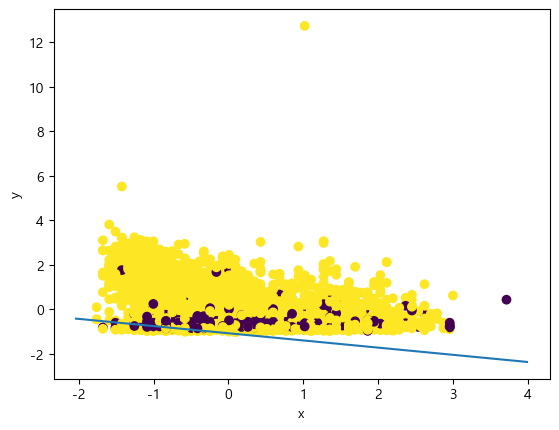

In [35]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#
plt.scatter(np.array(X_train_scaled)[:,0], np.array(X_train_scaled)[:,1], c=y_train)
#
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_plot = np.linspace(xmin,xmax)
for coef, intercept in zip(model_lr.coef_,model_lr.intercept_):
    plt.plot(x_plot, -(x_plot * coef[0] + intercept)/ coef[1])
#
##plt.title('선형 다중 분류 모델')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

########################################
### w값(coef_), biase값(intercept_) 출력
#######################################

In [36]:
model_lr.coef_

array([[ 0.53757328,  1.66703606, -0.75473532]])

In [37]:
model_lr.intercept_

array([1.78100605])

## [실습 ]아래 작업내용에 대하여 이해해야 합니다.
### pvalue 값에 대하여 이해하세요

- 참고: 먼저 읽어보세요. https://3months.tistory.com/27

- 참고: https://rfriend.tistory.com/513 선형회귀 분석 자료도 있음.

- 참고: 회귀분석 https://mindscale.kr/course/basic-stat-r/collinearity/

### from statsmodels.formula.api import ols
- 참고: 회귀분석 http://doc.mindscale.kr/km/python/09.html

In [38]:
########################################
### 관측치 값들의 관여 민감도
### P>\z\ 값의 크기를 확인하여서 x1,x2,x3(넘파이로 변환해서 이렇게 나옴. 판다스형태에서 작업하면 변수명 출력됨)
###  x1(alcohol), x2(sugar), x3(PH) 값이 모두 특징값으로 참여해도 됨을 확인하는 작업임.
## import statsmodels.api as sm 를 이용하여서 
#######################################

# (p- 값 <0.05, 5 % 유의 수준). 계수는 양수이며 로그 승산 조건임

import statsmodels.api as sm

logitreg = sm.Logit(y_train, X_train_scaled)
logitreg_fit = logitreg.fit()

results=logitreg_fit.summary()
results

Optimization terminated successfully.
         Current function value: 0.603012
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                -0.07222
Time:                        13:22:59   Log-Likelihood:                -2741.9
converged:                       True   LL-Null:                       -2557.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.3909      0.036     10.961      0.000       0.321       0.461
sugar          0.7238      0.040     18.279      0.000       0.646       0.801
PH            -0.5539      0.036    -15.380      0.000      -0.624      -0.483
==============================================================================
"""

In [39]:
# 해석: alcohol값이 1 증가할때마다 class가 1이 될 확률이 1.8배 증가함.
import numpy as np
np.exp(logitreg_fit.params)   

alcohol    1.478285
sugar      2.062197
PH         0.574701
dtype: float64

## [미션] 분류리포트와 혼돈행렬출력

In [40]:
########################################
### 로지스틱회귀를 다시 실행하였습니다.
#######################################
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

########################################
### 분류 리포트 출력
#######################################

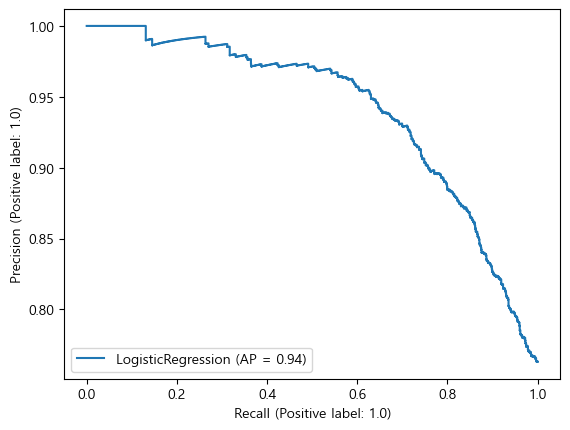

In [41]:
from sklearn.metrics import plot_precision_recall_curve
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test_scaled, y_test, ax=ax)
#plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

########################################
### 혼돈행렬 출력
#######################################

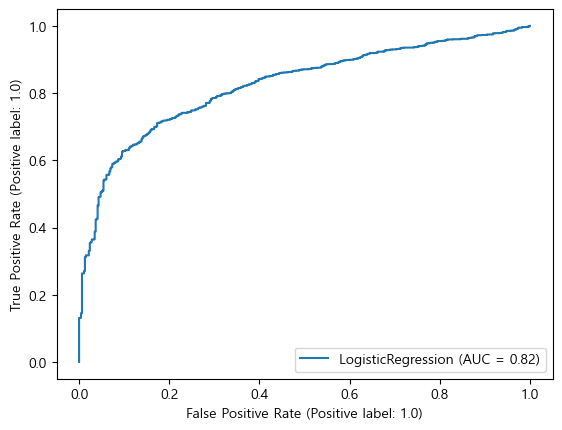

In [42]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test_scaled, y_test, ax=ax)
#plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

## [실습 및 미션]
### 아래의 내용으로 임계값에 대하여 이해합니다.

In [43]:
# 0 또는 1 예측값임.
pred_y = lr.predict(X_test_scaled)
pred_y

array([1., 1., 1., ..., 1., 1., 1.])

In [44]:
# 임계값을 이용하여 사용자가 y예측값을 조정할수 있음.(사용자가 임계값을 지정하여서 1이 될수 있는 값의 영역을 설정할 수 있음)

def cut_off(y, threshold) :
    newY = y.copy()  
    newY[newY>threshold] = 1
    newY[newY<threshold] = 0
    return newY.astype(int)
    
result_pred_y = cut_off(pred_y, 0.5)   # 0.5, 0.4등 값 조정 가능함.
result_pred_y

array([1, 1, 1, ..., 1, 1, 1])

########################################
### 오전에 제공한 김한용님 자료를 참고하여 또는 직접 수정하여서 분류리포트의 재현율및 정밀도등
### 필요한 값의 성능을 올려 봅니다.
#######################################

In [45]:
model_lr = LogisticRegression(solver='liblinear') 
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

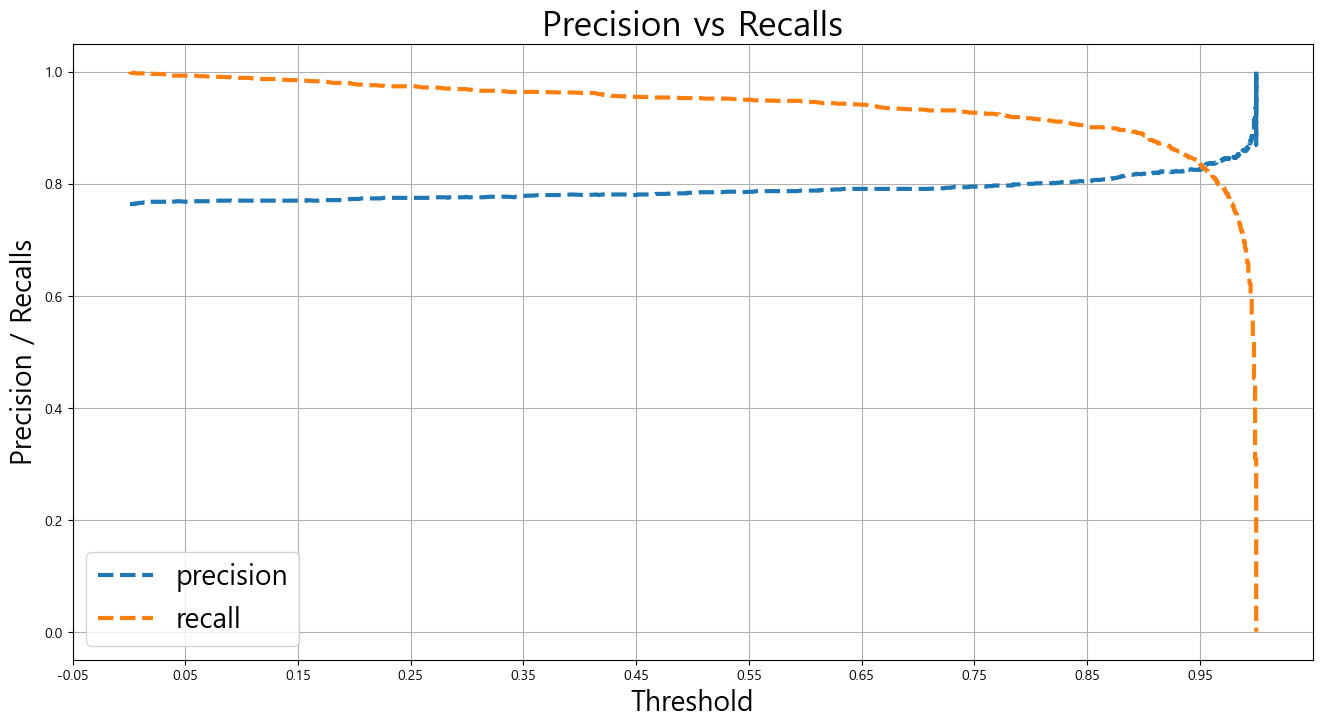

In [46]:
# 사망시 재현율값이 0.35로서 매우 낮기 때문에 임계값을 조정해서 재현율값을 좀 더 향샹시킬 수 있는지 알아보겠습니다.

from sklearn.metrics import precision_recall_curve

# 모델 modle_lr의 label값이 1일 예측 확률 array를 추출합니다.
pred_probs_1 = model_lr.predict_proba(X_test_scaled)[:, 1]  

# 실제 y_test값과 label값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력합니다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_probs_1)

# print(thresholds.shape)  # (73,)
# 반환된 임계값 array의 총 원소개수만큼 추출합니다.
thr_index = np.arange(0, thresholds.shape[0])  
#print(thr_index)    # # [ 0 1 2 3 .......... 72]

# 7 step단위로 추출된 임계값에 따른 임계값 정밀도와 재현율값
thresholds = np.round(thresholds[thr_index], 3)
precisions = np.round(precisions[thr_index], 3)
recalls = np.round(recalls[thr_index], 3)

plt.figure(figsize=(16,8))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', linewidth=3, label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', linewidth=3, label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel('Threshold', fontsize=20)
plt.ylabel('Precision / Recalls', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.title('Precision vs Recalls', fontsize=25)
plt.grid()
plt.show()

In [47]:
# threshold값 변화에 따른 classification report를 출력합니다.
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값
thr_list = [0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55]

for thr in thr_list:
    pred_probs_1 = model_lr.predict_proba(X_test_scaled)[:, 1].reshape(-1,1)
    binarizer = Binarizer(threshold=thr)
    binarizer.fit(pred_probs_1)
    pred = binarizer.transform(pred_probs_1)
    
    print('-------------------------- 임계값 : '+str(thr)+' -------------------------------')
    print(classification_report(y_test, pred))

-------------------------- 임계값 : 0.4 -------------------------------
              precision    recall  f1-score   support

         0.0       0.51      0.13      0.20       462
         1.0       0.78      0.96      0.86      1488

    accuracy                           0.76      1950
   macro avg       0.65      0.55      0.53      1950
weighted avg       0.72      0.76      0.71      1950

-------------------------- 임계값 : 0.425 -------------------------------
              precision    recall  f1-score   support

         0.0       0.50      0.13      0.21       462
         1.0       0.78      0.96      0.86      1488

    accuracy                           0.76      1950
   macro avg       0.64      0.55      0.54      1950
weighted avg       0.71      0.76      0.71      1950

-------------------------- 임계값 : 0.45 -------------------------------
              precision    recall  f1-score   support

         0.0       0.48      0.14      0.21       462
         1.0       0.78    

## [미션] 리지모델을 실행하여 봅니다.
########################################
### 리지모델 제작 및 실행 
#######################################

In [48]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
ridge_params = {'alpha':np.logspace(-4, 1, 6)} 

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
wine_ridge = {
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        X_train_scaled.iloc[:,-5:], X_train_scaled['PH']).best_estimator_,}

## [미션] 라쏘모델을 실행하여 봅니다.
########################################
### 라쏘모델 제작 및 실행 
#######################################

In [49]:
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 

wine_lasso = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        X_train_scaled.iloc[:,-5:], X_train_scaled['PH']).best_estimator_}

## [미션] 랜덤포레스트 모델을 실행하여 봅니다.
########################################
### 랜덤 포레스트모델 제작 및 실행 
#######################################

In [50]:
import time
from sklearn.ensemble import RandomForestRegressor 
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

wine_rf = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(X_train_scaled.iloc[:,-5:], X_train_scaled['PH']).best_estimator_}

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 481.47초


## [미션] XGboost 모델을 실행하여 봅니다.
########################################
### XGboos포레스트모델 제작 및 실행 
#######################################

In [51]:
import xgboost as xgb 
start = time.time() # 시작 시간 저장

# xgboost parmeter space를 정의한다.
XGB_params = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]}
# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_wine_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1) 

# 모델 학습
XGB_wine_gridsearch.fit(X_train_scaled.iloc[:,-5:], X_train_scaled['PH'])

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 387.702초


## [실습] decision tree (의사 결정 트리 )

In [52]:
from sklearn.tree import DecisionTreeClassifier

train_target=y_train
test_target=y_test

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, train_target)

print(dt.score(X_train_scaled, train_target))
print(dt.score(X_test_scaled, test_target))

0.9973608972949197
0.8523076923076923


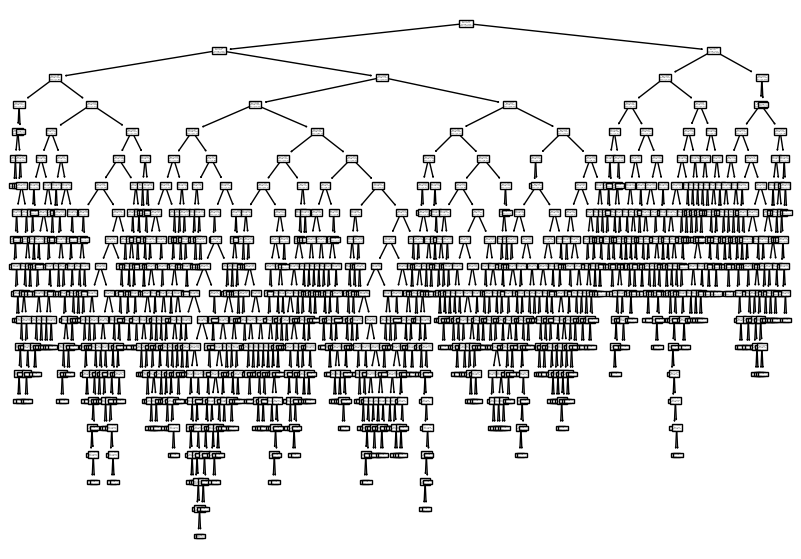

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

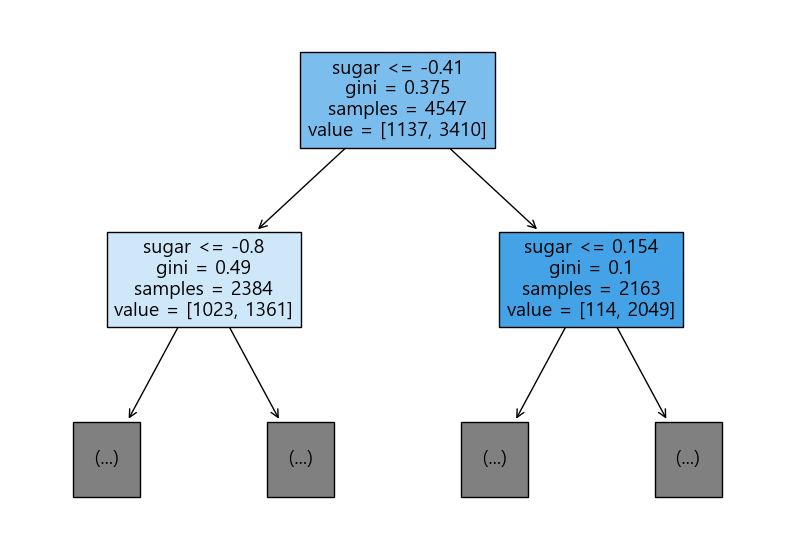

In [54]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [55]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, train_target)

print(dt.score(X_train_scaled, train_target))
print(dt.score(X_test_scaled, test_target))

0.8484715196833077
0.8512820512820513


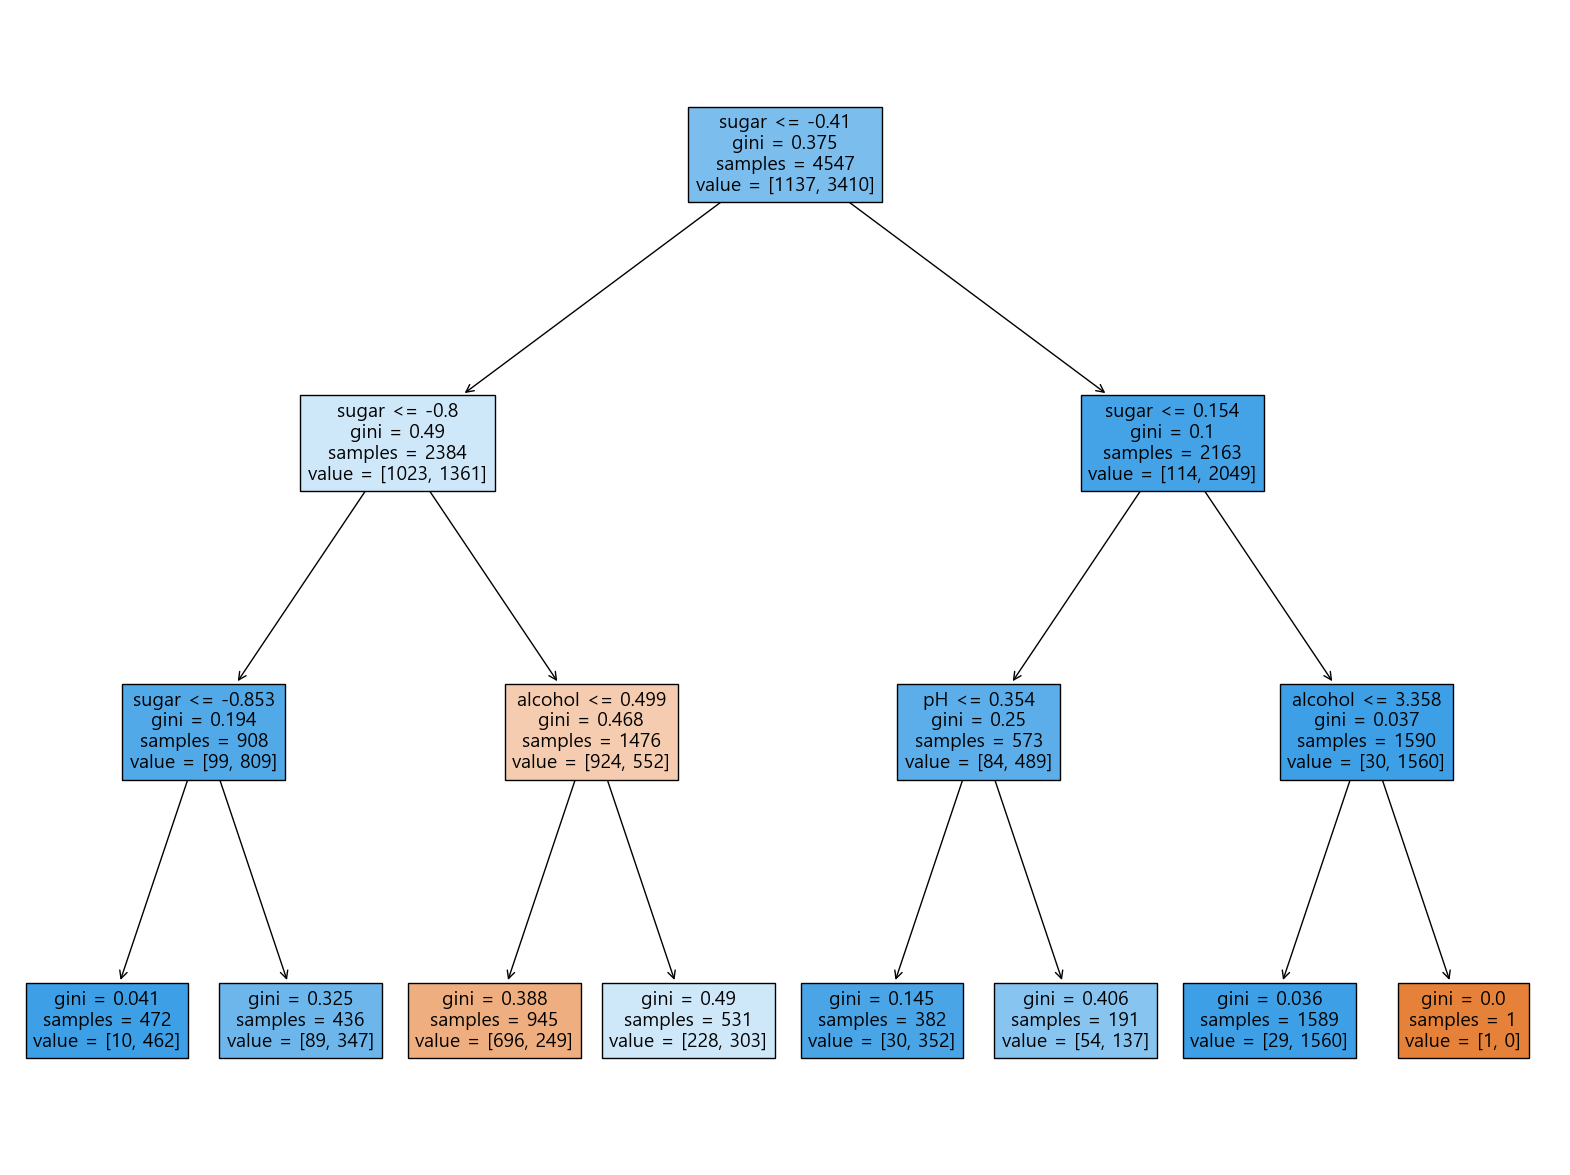

In [56]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [57]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8484715196833077
0.8512820512820513


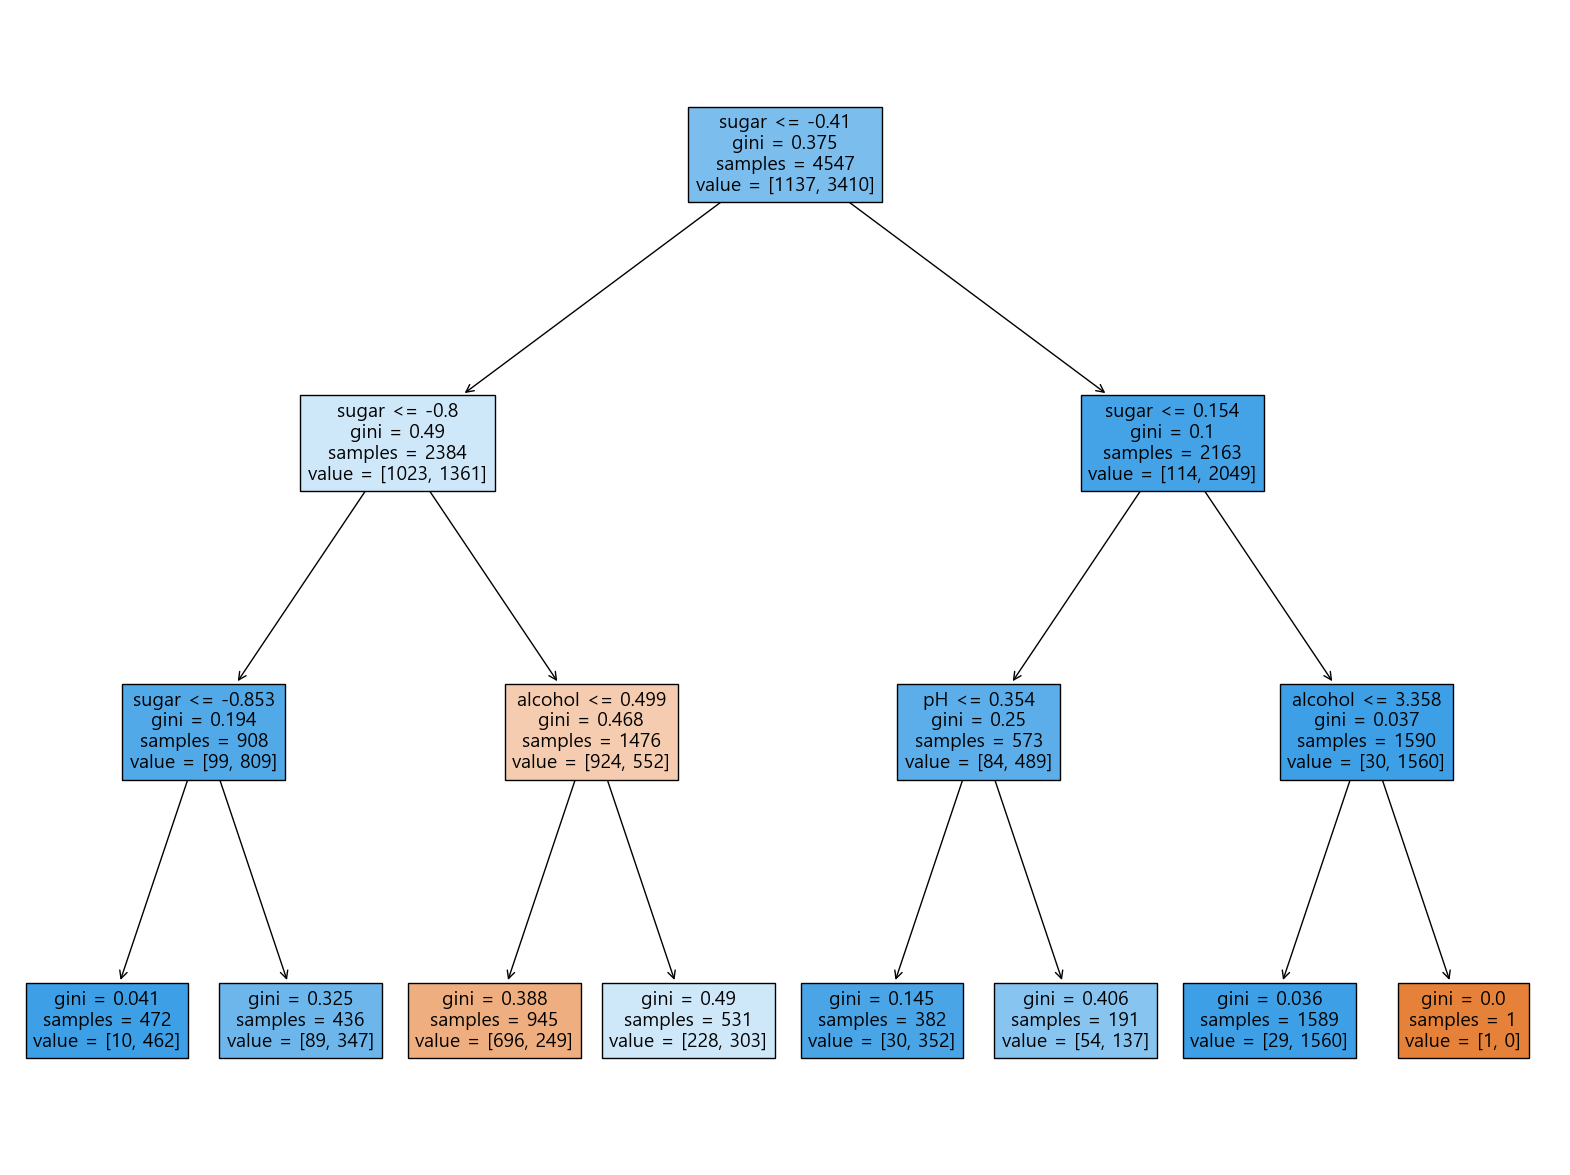

In [58]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [59]:
print(dt.feature_importances_)

[0.09081547 0.89458869 0.01459584]


In [60]:
# 확인
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8832197053001979
0.862051282051282


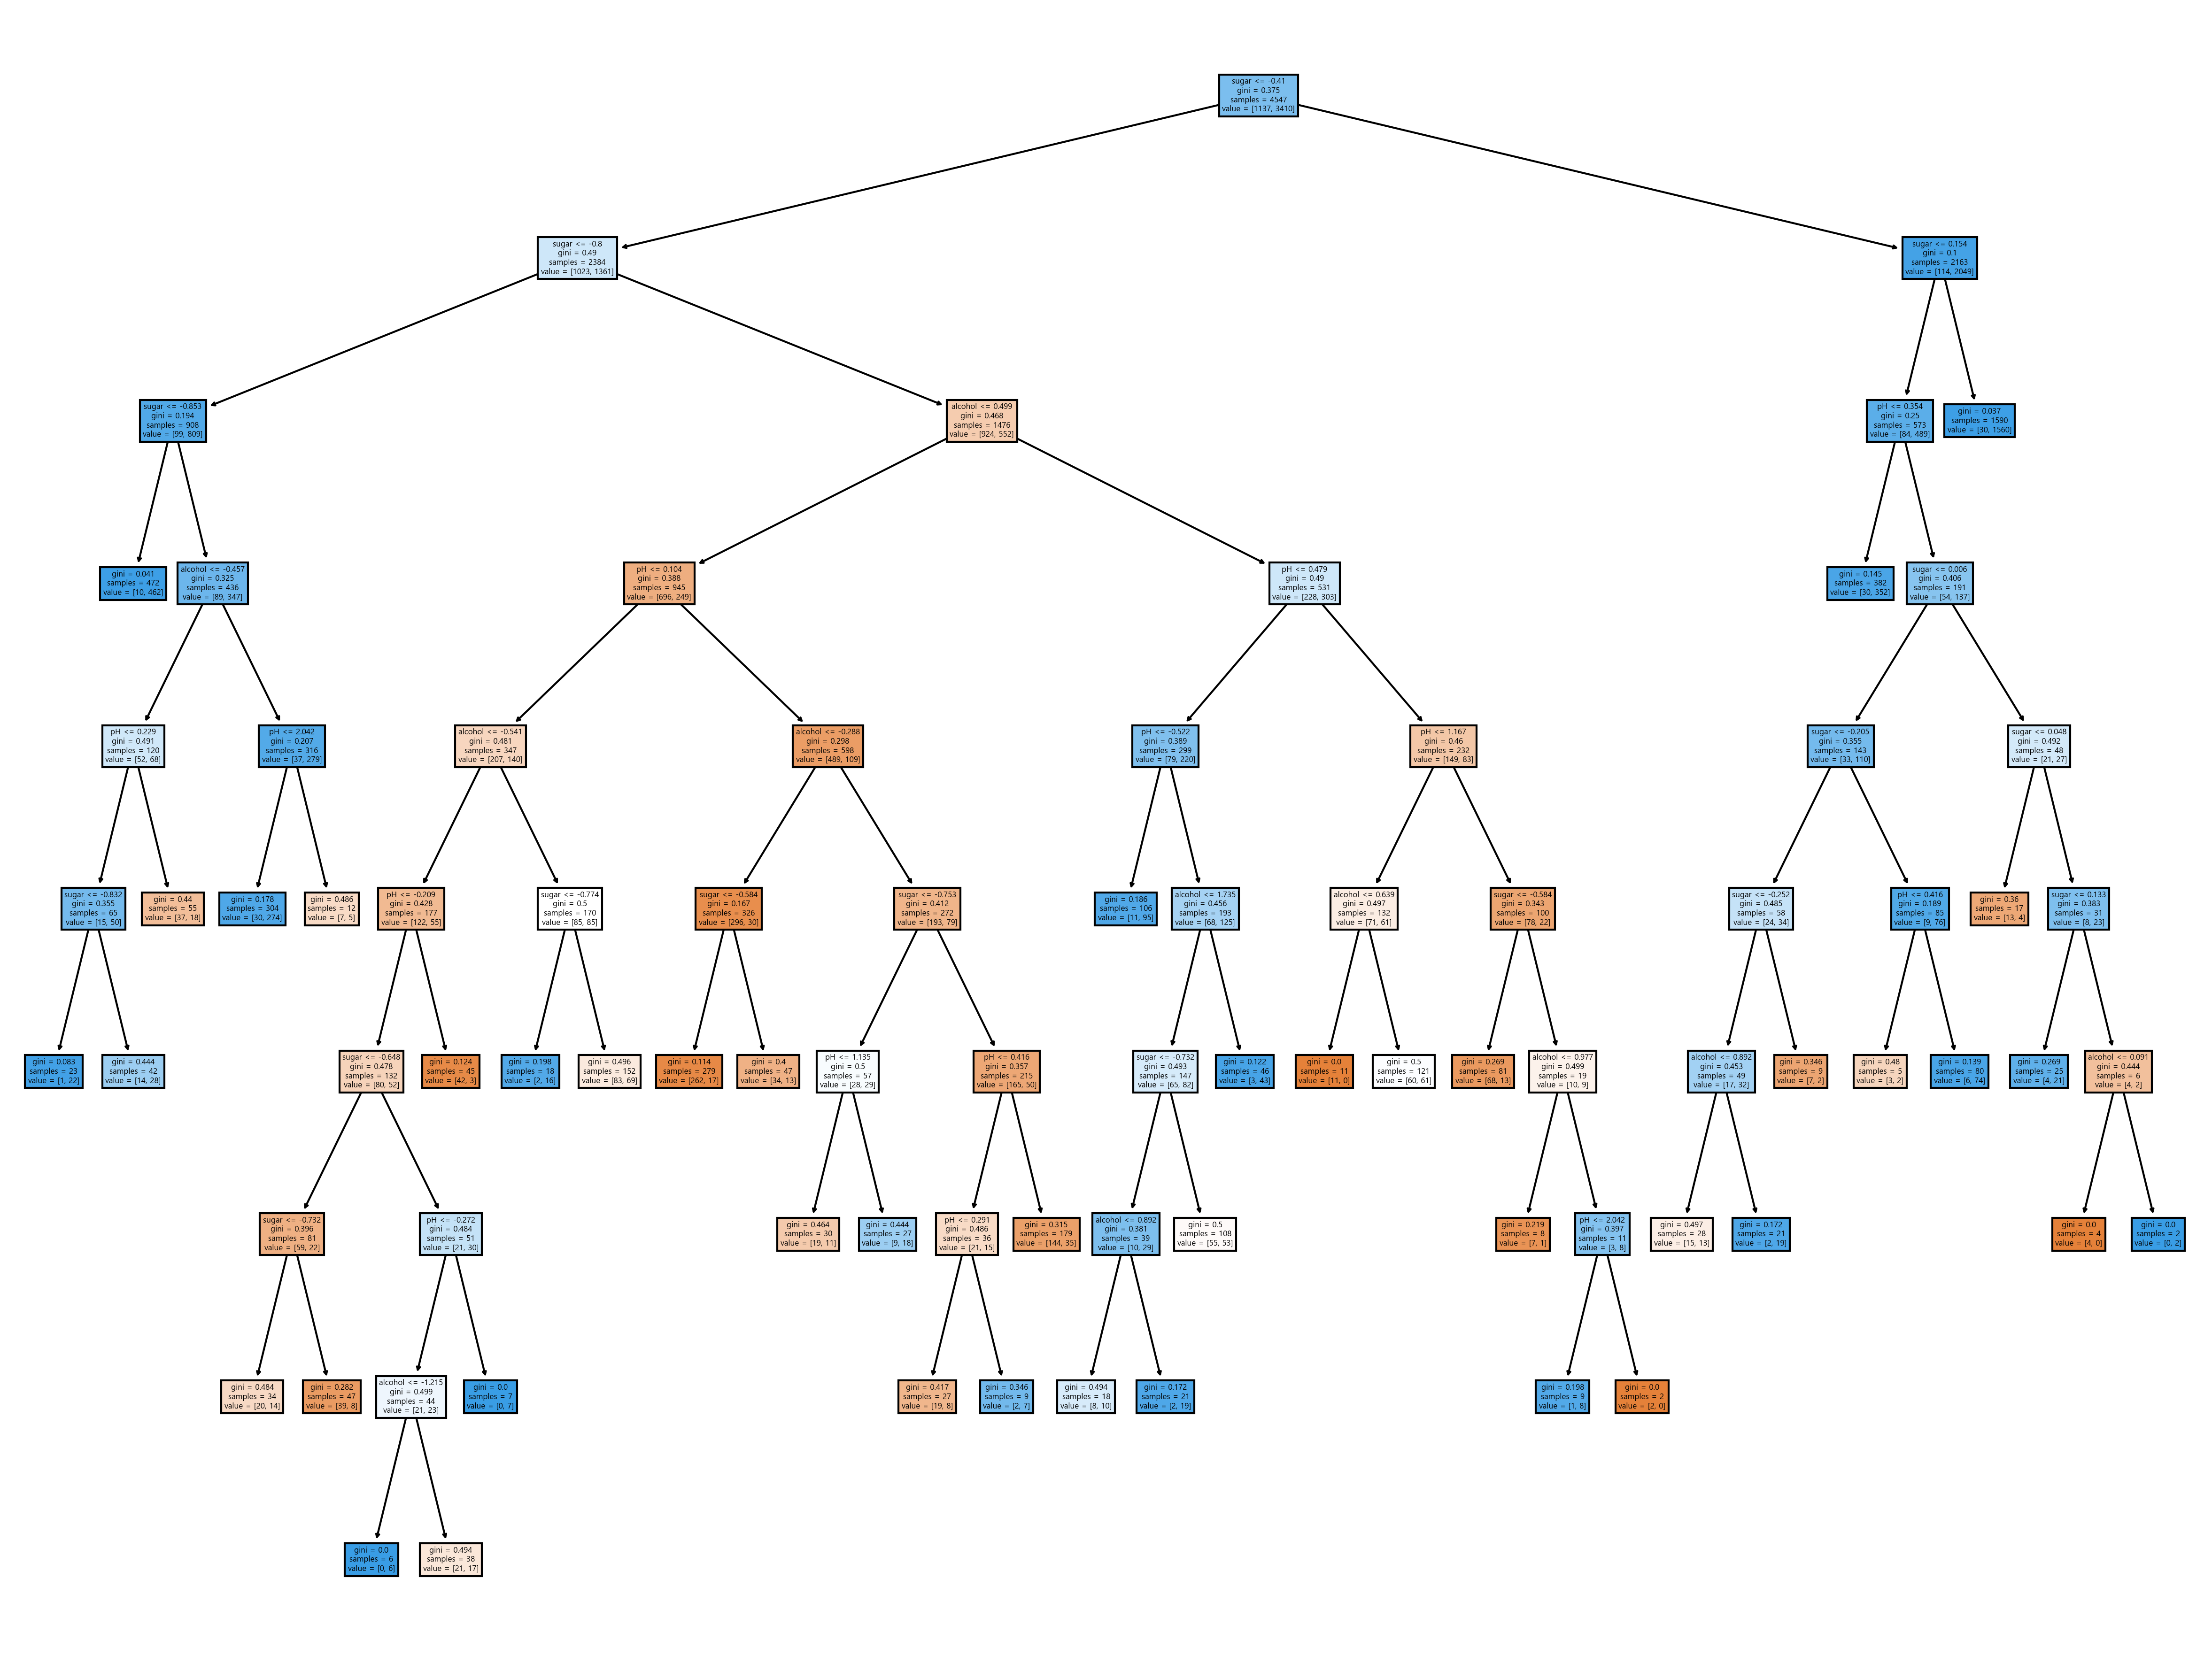

In [61]:
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()